In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data = {
    'Tweet': [
        "I love Twitter! It's amazing 😊",
        "Twitter is full of fake news!!",
        "Twitter is just a platform",
        "So much hate and negativity here",
        "Twitter is awesome and helpful"
    ]
}
df = pd.DataFrame(data)
df.head()

,Tweet
0,I love Twitter! It's amazing 😊
1,Twitter is full of fake news!!
2,Twitter is just a platform
3,So much hate and negativity here
4,Twitter is awesome and helpful


In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)                # remove links
    text = re.sub(r"@\w+|#\w+", "", text)              # mentions/hashtags
    text = re.sub(r"[^\w\s]", "", text)                # punctuation
    text = text.lower()                                # lowercase
    return " ".join(w for w in text.split() if w not in stop_words)

df['Clean_Tweet'] = df['Tweet'].astype(str).apply(clean_text)

In [5]:
positive_words = ['love', 'awesome', 'amazing', 'helpful', 'good', 'great', 'happy', 'joy']
negative_words = ['hate', 'fake', 'bad', 'terrible', 'sad', 'angry', 'negativity']

def basic_sentiment(text):
    pos = sum(1 for word in text.split() if word in positive_words)
    neg = sum(1 for word in text.split() if word in negative_words)
    if pos > neg:
        return "Positive"
    elif neg > pos:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Predicted'] = df['Clean_Tweet'].apply(basic_sentiment)
df[['Tweet', 'Clean_Tweet', 'Sentiment_Predicted']].head()

,Tweet,Clean_Tweet,Sentiment_Predicted
0,I love Twitter! It's amazing 😊,love twitter amazing,Positive
1,Twitter is full of fake news!!,twitter full fake news,Negative
2,Twitter is just a platform,twitter platform,Neutral
3,So much hate and negativity here,much hate negativity,Negative
4,Twitter is awesome and helpful,twitter awesome helpful,Positive


/tmp/ipython-input-14-1773141407.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


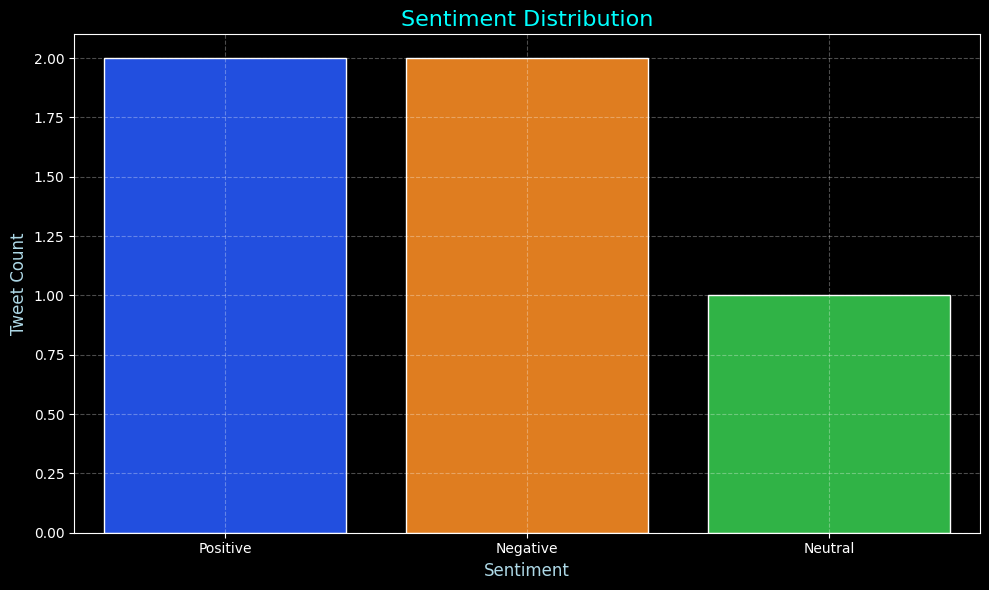

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dark background style
plt.style.use('dark_background')

# Bigger figure
plt.figure(figsize=(10,6))

# Countplot with bright colors on dark background
sns.countplot(
    x='Sentiment_Predicted',
    data=df,
    palette='bright',    # 'bright' palette shows better on dark
    edgecolor='white'    # optional: white border around bars
)

# Add chart labels and title
plt.title('Sentiment Distribution', fontsize=16, color='cyan')
plt.xlabel('Sentiment', fontsize=12, color='lightblue')
plt.ylabel('Tweet Count', fontsize=12, color='lightblue')

# Grid and styling
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


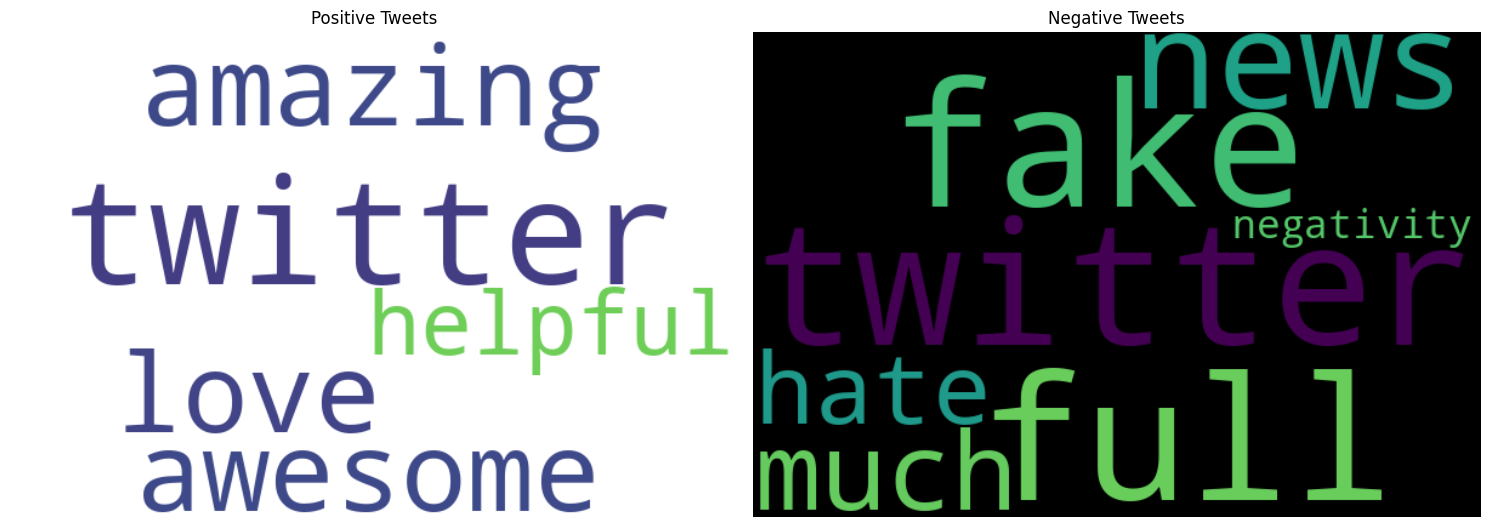

In [13]:
!pip install wordcloud
from wordcloud import WordCloud

# Generate text blobs
positive = ' '.join(df[df['Sentiment_Predicted'] == 'Positive']['Clean_Tweet'])
negative = ' '.join(df[df['Sentiment_Predicted'] == 'Negative']['Clean_Tweet'])

# WordCloud plot
plt.figure(figsize=(15,6))

# Positive
plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets')

# Negative
plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=600, height=400, background_color='black').generate(negative)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets')

plt.tight_layout()
plt.show()


In [8]:
df.to_csv("cleaned_sentiment_data.csv", index=False)